In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def get_result(reward, terminal):
    global Q
    result = dict()
    num = reward.shape[0]
    for t in range(rep):
        allroutes = []
        Q = np.array(np.zeros([num,num]))+0.1
        n_state = 0
        for i in range(trialnum):#1万回繰り返し学習を行う
            route = [n_state]
            while route[-1]+1 not in terminal:
                p_state = route[-1]
                n_actions = []
                for j in range(num):
                    if reward[p_state,j] >= 1:
                        n_actions.append(j)
                prob = Q[p_state,n_actions]
                n_state = np.random.choice(n_actions,p=prob/np.sum(prob)) #行動可能選択肢からランダムに選択
                rwd = reward[p_state,n_state]
                if n_state + 1 in terminal and check_rwd(route+[n_state], i):
                    rwd += 100
                Q[p_state,n_state] = (1-alpha)*Q[p_state,n_state]+alpha*(rwd+gamma*Q[n_state,np.argmax(Q[n_state,])])
                route.append(n_state)
            n_state = np.where(reward[n_state, :] > 0)[0]
            allroutes.append(route)
        result[t] = allroutes
    return result

In [3]:
gamma = 0.6
alpha = 0.4
trialnum = 80
swblock = 20
rep = 40
def check_rwd(route, count):
    if count < swblock:
        return len(route) == 3
    elif count < swblock*2:
        return len(route) == 5
    else:
        return len(route) >= 7

In [4]:
def get_reward(actdict):
    num = len(actdict)
    reward = np.zeros((num,num))
    for key,val in actdict.items():
        reward[key-1][np.array(val)-1] = 1
    return reward

In [5]:
def rwdplot(result):
    rwdrate = np.array([[check_rwd(r,n) for n,r in enumerate(route)] for _,route in result.items()])
    plt.figure(figsize = (10,4))
    for i in range(1,int(trialnum/swblock)-1):
        plt.plot([swblock*i-0.5,swblock*i-0.5], [-5,105], "--",color = "#555555")
    plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(rep),fmt="go-")
    plt.xlabel("trial index", fontsize = 20)
    plt.ylabel("correct [%]", fontsize = 20)
    plt.xticks(np.arange(-0.5,trialnum+1,20),np.arange(0,trialnum+1,20), fontsize = 15)
    plt.yticks(fontsize = 15) 
    plt.ylim([-5,105])
    #plt.savefig("./figure/dropby_2times_correct.png", bbox_inches = "tight")
    return rwdrate

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [False,  True, False, ...,  True,  True,  True]])

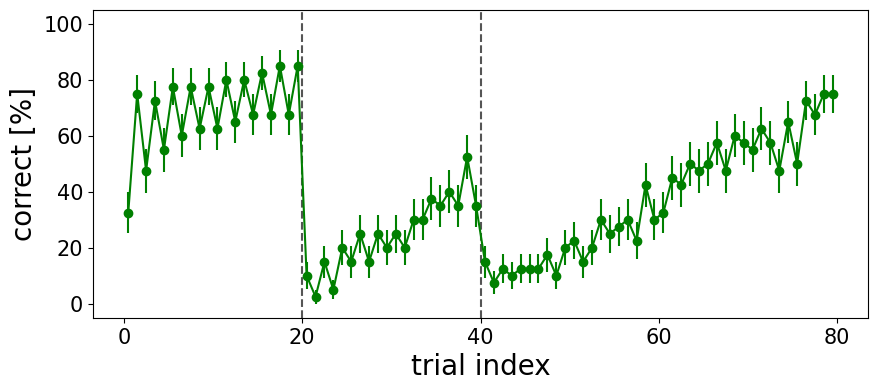

In [6]:
actdict = {1: [3], 2:[4], 3: [7,10], 4: [7,10], 5:[9,11], \
        6:[8,12], 7: [5], 8: [6], 9: [6], 10: [1], 11: [2], 12: [2]} 
terminal = [10,11,12]
reward = get_reward(actdict)
result4 = get_result(reward, terminal)
rwdplot(result4)

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False]])

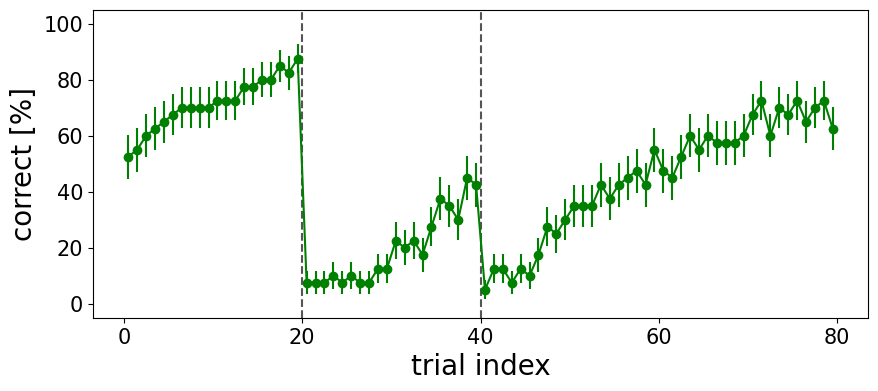

In [15]:
actdict = {1: [3], 2: [3], 3: [6,8], 4:[7,9], 5: [7,9],\
            6: [4], 7: [5], 8: [1], 9: [2]}  
terminal = [8,9]
reward = get_reward(actdict)
result3 = get_result(reward, terminal)
rwdplot(result3)

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False,  True],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

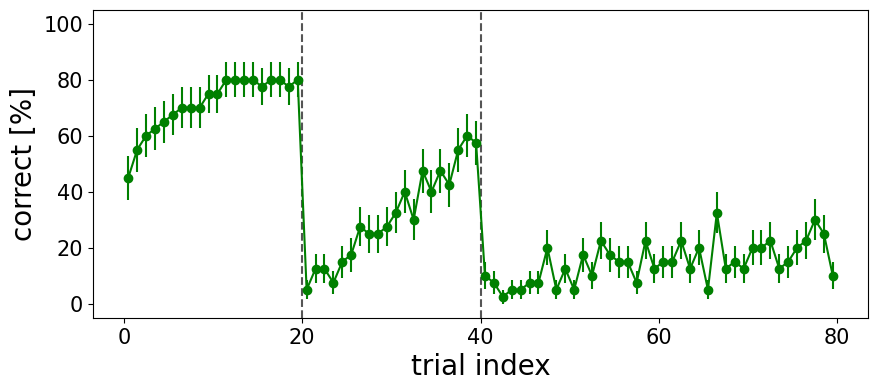

In [8]:
actdict = {1: [2], 2: [4,6],3: [5,7], 4: [3], 5: [3], 6: [1], 7: [1]} 
terminal = [6,7]
reward = get_reward(actdict)
result2 = get_result(reward, terminal)
rwdplot(result2)

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [ True,  True,  True, ...,  True, False, False]])

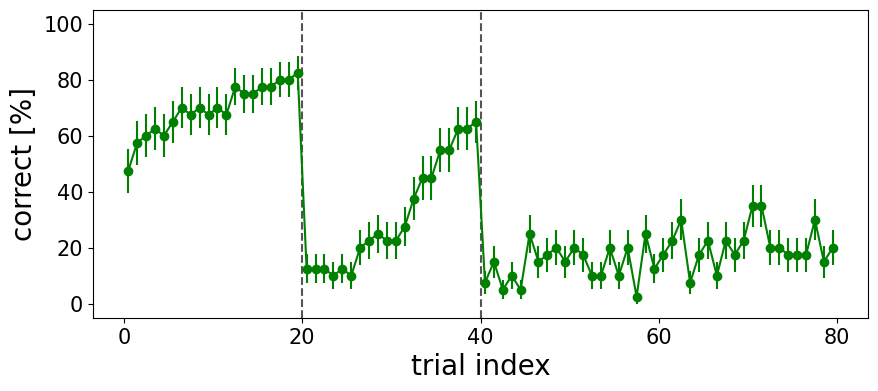

In [9]:
actdict = {1: [2], 2: [4,5], 3: [4,5], 4: [3], 5: [1]}  
terminal = [5]
reward = get_reward(actdict)
result1 = get_result(reward, terminal)
rwdplot(result1)

array([[ True,  True,  True, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [ True,  True,  True, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [ True,  True,  True, ..., False, False, False],
       [False,  True,  True, ...,  True, False, False]])

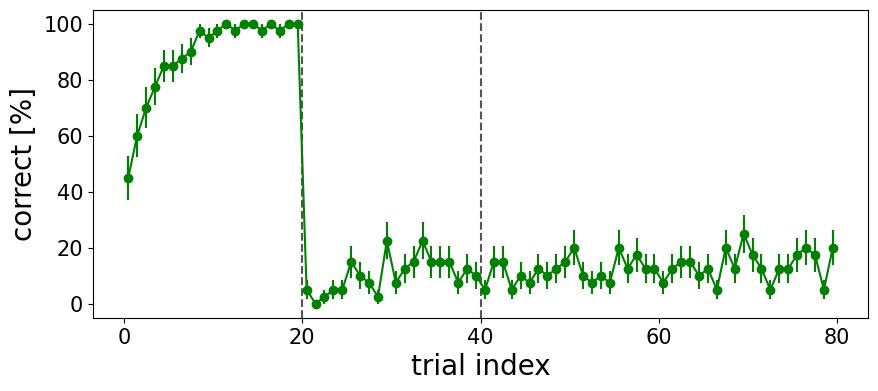

In [17]:
actdict = {1: [2], 2: [3,4], 3: [2], 4: [1]}  
terminal = [4]
reward = get_reward(actdict)
result0 = get_result(reward, terminal)
rwdplot(result0)

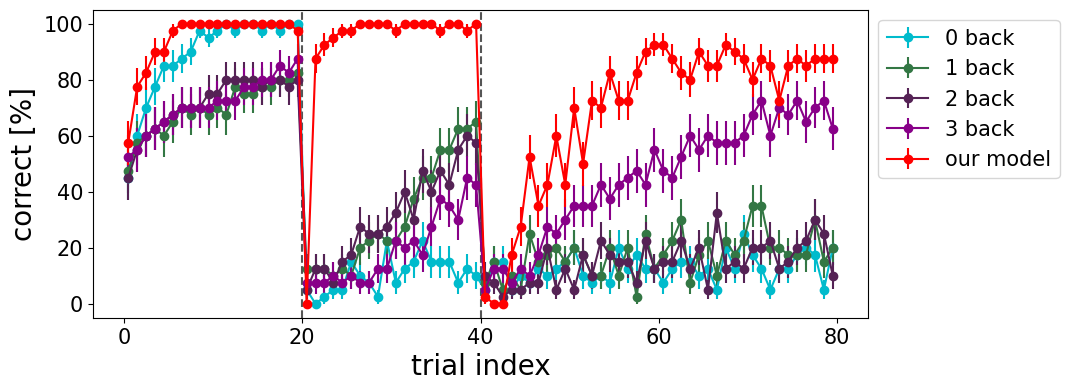

In [18]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/swblock)-1):
    plt.plot([swblock*i-0.5,swblock*i-0.5], [-5,105], "--",color = "#555555")

clr = ["#00bbcc","#337744","#552255","#880088","#ff0000"]
lbl = ["0 back","1 back","2 back","3 back","our model"]
for n,result in enumerate([result0, result1,result2,result3]):
    rwdrate = np.array([[check_rwd(r,n) for n,r in enumerate(route)] for _,route in result.items()])
    plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(rep),\
             color = clr[n], fmt="o-", label = lbl[n])
with open("./pkls/dropby_2times{}.pkl".format(""), mode = "rb") as f:
    allresult = pickle.load(f)
rwdrate = np.zeros((rep,trialnum))
for x in range(rep):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(rep),\
             color = clr[4], fmt="o-", label = lbl[4])
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize = 15)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,20),np.arange(0,trialnum+1,20), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/dropby_2time_correct_TD.png", bbox_inches = "tight")